# Introduction
Notebook contains EDA of [Soccer detailed players match data](https://www.kaggle.com/datasets/spicemix/soccer-detailed-players-match-data?resource=download) dataset and is first milestone of clustering project for Introduction to Machine Learning university course

## Initial data description



* details of the match statistics for each player 
* two tables with the same structure - both home and away teams
* each row represents one player for the given match
* 127 columns


## Data import

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [3]:
home_df = pd.read_csv("..\data\players_home_matches.csv")
away_df = pd.read_csv("..\data\players_away_matches.csv")

We'll focus on the home matches dataset since both of the tables have similar structure

In [4]:
df = home_df

In [5]:
df.head()

,Unnamed: 0,awayScore,awayTeamName,awayTeamTacticalSchema,homeScore,homeTeamName,homeTeamTacticalSchema,matchDate,matchWeek,playerName,...,touches_att_3rd,touches_att_pen_area,touches_def_3rd,touches_def_pen_area,touches_live_ball,touches_mid_3rd,xa,xg,team_name,championship_name
0,0,0,Alavés,(4-1-4-1),2,Athletic Club,(4-2-3-1),2019-09-22,5,Raúl García,...,28.0,6.0,2.0,0.0,50.0,23.0,0.1,0.9,Athletic Club,liga
1,1,0,Atlético Madrid,(4-4-2),2,Athletic Club,(4-2-3-1),2019-03-16,28,Mikel San José,...,9.0,3.0,10.0,1.0,49.0,31.0,0.1,0.0,Athletic Club,liga
2,2,0,Real Betis,(3-1-4-2),1,Athletic Club,(4-2-3-1),2019-01-27,21,Óscar de Marcos,...,24.0,6.0,3.0,1.0,32.0,7.0,0.4,0.1,Athletic Club,liga
3,3,1,Real Sociedad,(4-2-3-1),0,Athletic Club,(4-2-3-1),2020-12-31,16,Unai López,...,3.0,1.0,3.0,1.0,11.0,8.0,0.0,0.1,Athletic Club,liga
4,4,2,Rayo Vallecano,(4-2-3-1),3,Athletic Club,(4-2-3-1),2019-04-14,32,Iñigo Córdoba,...,20.0,3.0,8.0,1.0,43.0,19.0,0.3,0.0,Athletic Club,liga


In [6]:
home_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76215 entries, 0 to 76214
Data columns (total 127 columns):
 #    Column                       Non-Null Count  Dtype  
---   ------                       --------------  -----  
 0    Unnamed: 0                   76215 non-null  int64  
 1    awayScore                    76215 non-null  int64  
 2    awayTeamName                 76215 non-null  object 
 3    awayTeamTacticalSchema       76215 non-null  object 
 4    homeScore                    76215 non-null  int64  
 5    homeTeamName                 76215 non-null  object 
 6    homeTeamTacticalSchema       76215 non-null  object 
 7    matchDate                    76215 non-null  object 
 8    matchWeek                    76215 non-null  int64  
 9    playerName                   76215 non-null  object 
 10   aerials_lost                 76142 non-null  float64
 11   aerials_won                  76142 non-null  float64
 12   aerials_won_pct              53345 non-null  float64
 13  

In [8]:
columns = home_df.columns[home_df.isnull().mean() > 0.3]
print(columns)

Index(['aerials_won_pct', 'dribble_tackles_pct', 'dribbles_completed_pct'], dtype='object')


In [10]:
null_threshold = 0.5
rows_with_nulls  = home_df[home_df.isnull().sum(axis=1) >= null_threshold*len(home_df.columns)]
print(len(rows_with_nulls))

73


We can see that there are some columns with a lot NULL values, and also some rows that doesn't contain much information

## Extended data description

### Our dataset consists of 117 numeric and 8 non-numeric columns

### Non-numeric columns are:
- championship_name 
- matchDate 
- homeTeamName                  
- awayTeamName 
- homeTeamTacticalSchema        
- awayTeamTacticalSchema        
- team_name                     
- playerName    

### The rest of columns which are numeric mostly describe various match statistics for each individual player from the home and away team

#### We decided to group these columns into a couple of categories:
- Offensive statistics
    - goals
    - assists
    - shots_total
    - shots_on_target
    - xg (oczekiwane gole)
    - xa (oczekiwane asysty)
    - gca (wielokrotne zdarzenia przyczyniające się do celnej akcji)
    - sca (wielokrotne zdarzenia przyczyniające się do strzału)
    - assisted_shots
    - carries
    - carries_into_final_third
    - carries_into_penalty_area
    - carry_distance
    - carry_progressive_distance
    - progressive_carries
    - dispossessed
    - dribble_tackles
    - dribble_tackles_pct
    - dribbled_past
    - errors
    - miscontrols
    - own_goals
    - pens_att
    - pens_conceded
    - pens_made
    - pens_won
    - players_dribbled_past
    - through_balls
    - corner_kicks
    - corner_kicks_in
    - corner_kicks_out
    - corner_kicks_straight
    - throw_ins

- Defensive statistics
    - interceptions
    - tackles
    - tackles_won
    - pressure_regains
    - pressures
    - ball_recoveries
    - blocks
    - blocked_shots
    - blocked_passes
    - clearances
    - tackles_att_3rd
    - tackles_def_3rd
    - tackles_interceptions
    - tackles_mid_3rd
    - touches_att_3rd
    - touches_att_pen_area
    - touches_def_3rd
    - touches_def_pen_area
    - touches_live_ball
    - touches_mid_3rd
    - pressures_att_3rd
    - pressures_def_3rd
    - pressures_mid_3rd
- Passes statistics
    - passes
    - passes_completed
    - passes_pct (procentowa skuteczność podań)
    - passes_progressive_distance (odległość postępujących podań)
    - passes_received (odebrane podania)
    - passes_received_pct (procentowa skuteczność odebranych podań)
    - passes_into_final_third
    - passes_into_penalty_area
    - progressive_passes (postępujące podania)
    - progressive_passes_received (odebrane postępujące podania)
    - passes_blocked
    - passes_completed_long
    - passes_completed_medium
    - passes_completed_short
    - passes_dead
    - passes_free_kicks
    - passes_ground
    - passes_head
    - passes_high
    - passes_intercepted
    - passes_left_foot
    - passes_live
    - passes_long
    - passes_low
    - passes_medium
    - passes_offsides
    - passes_oob
    - passes_other_body
    - passes_pct_long
    - passes_pct_medium
    - passes_pct_short
    - passes_pressure
    - passes_switches
    - passes_total_distance
- Dribble statistics
    - dribbles
    - dribbles_completed
    - dribbles_completed_pct
    - dribbles_vs
- Physical stats
    - aerials_lost
    - aerials_won
    - aerials_won_pct
    - fouled
    - fouls
    - nutmegs
    - offsides
- Other
    - age
    - minutes
    - matchWeek
    - homeScore
    - awayScore

## Selecting important columns based on our football knowledge

In [18]:
important_cols = [
    'goals',
    'assists',
    'shots_total',
    'shots_on_target',
    'xg',
    'xa',
    'gca',
    'carries',
    'dispossessed',
    'dribbled_past',
    'own_goals',
    'pens_made',
    'pens_won',
    'pens_att',
    'players_dribbled_past',
    'through_balls',
    'corner_kicks',
    'throw_ins',
    'interceptions',
    'tackles',
    'pressures',
    'ball_recoveries',
    'blocks',
    'blocked_shots',
    'clearances',
    'passes',
    'passes_progressive_distance',
    'passes_into_final_third',
    'passes_offsides',
    'passes_switches',
    'dribbles',
    'fouled',
    'fouls',
    'offsides',
    'minutes'
]
len(important_cols)

35

### Helpful functions to visualize the data

In [14]:
def plot_integer_hist(df, column, ax):
    bins = np.arange(df[column].min(), df[column].max() + 1.5) - 0.5
    sns.histplot(df[column], bins=bins, ax=ax)

    has_fractional_values = any(df[column] % 1 != 0)
    if not has_fractional_values:
        ax.set_xticks(bins + 0.5)

def plot_float_hist(df, column, ax):
    sns.histplot(df[column], ax=ax)

def create_subplots(df, columns, rows, cols, figsize=(15, 10), title=None):
    fig, axs = plt.subplots(rows, cols, figsize=figsize)
    axs = axs.flatten()
    for i, col in enumerate(columns):
        plot_integer_hist(df, col, axs[i])
    if title:
        plt.suptitle(title, fontsize=20)
    plt.tight_layout()

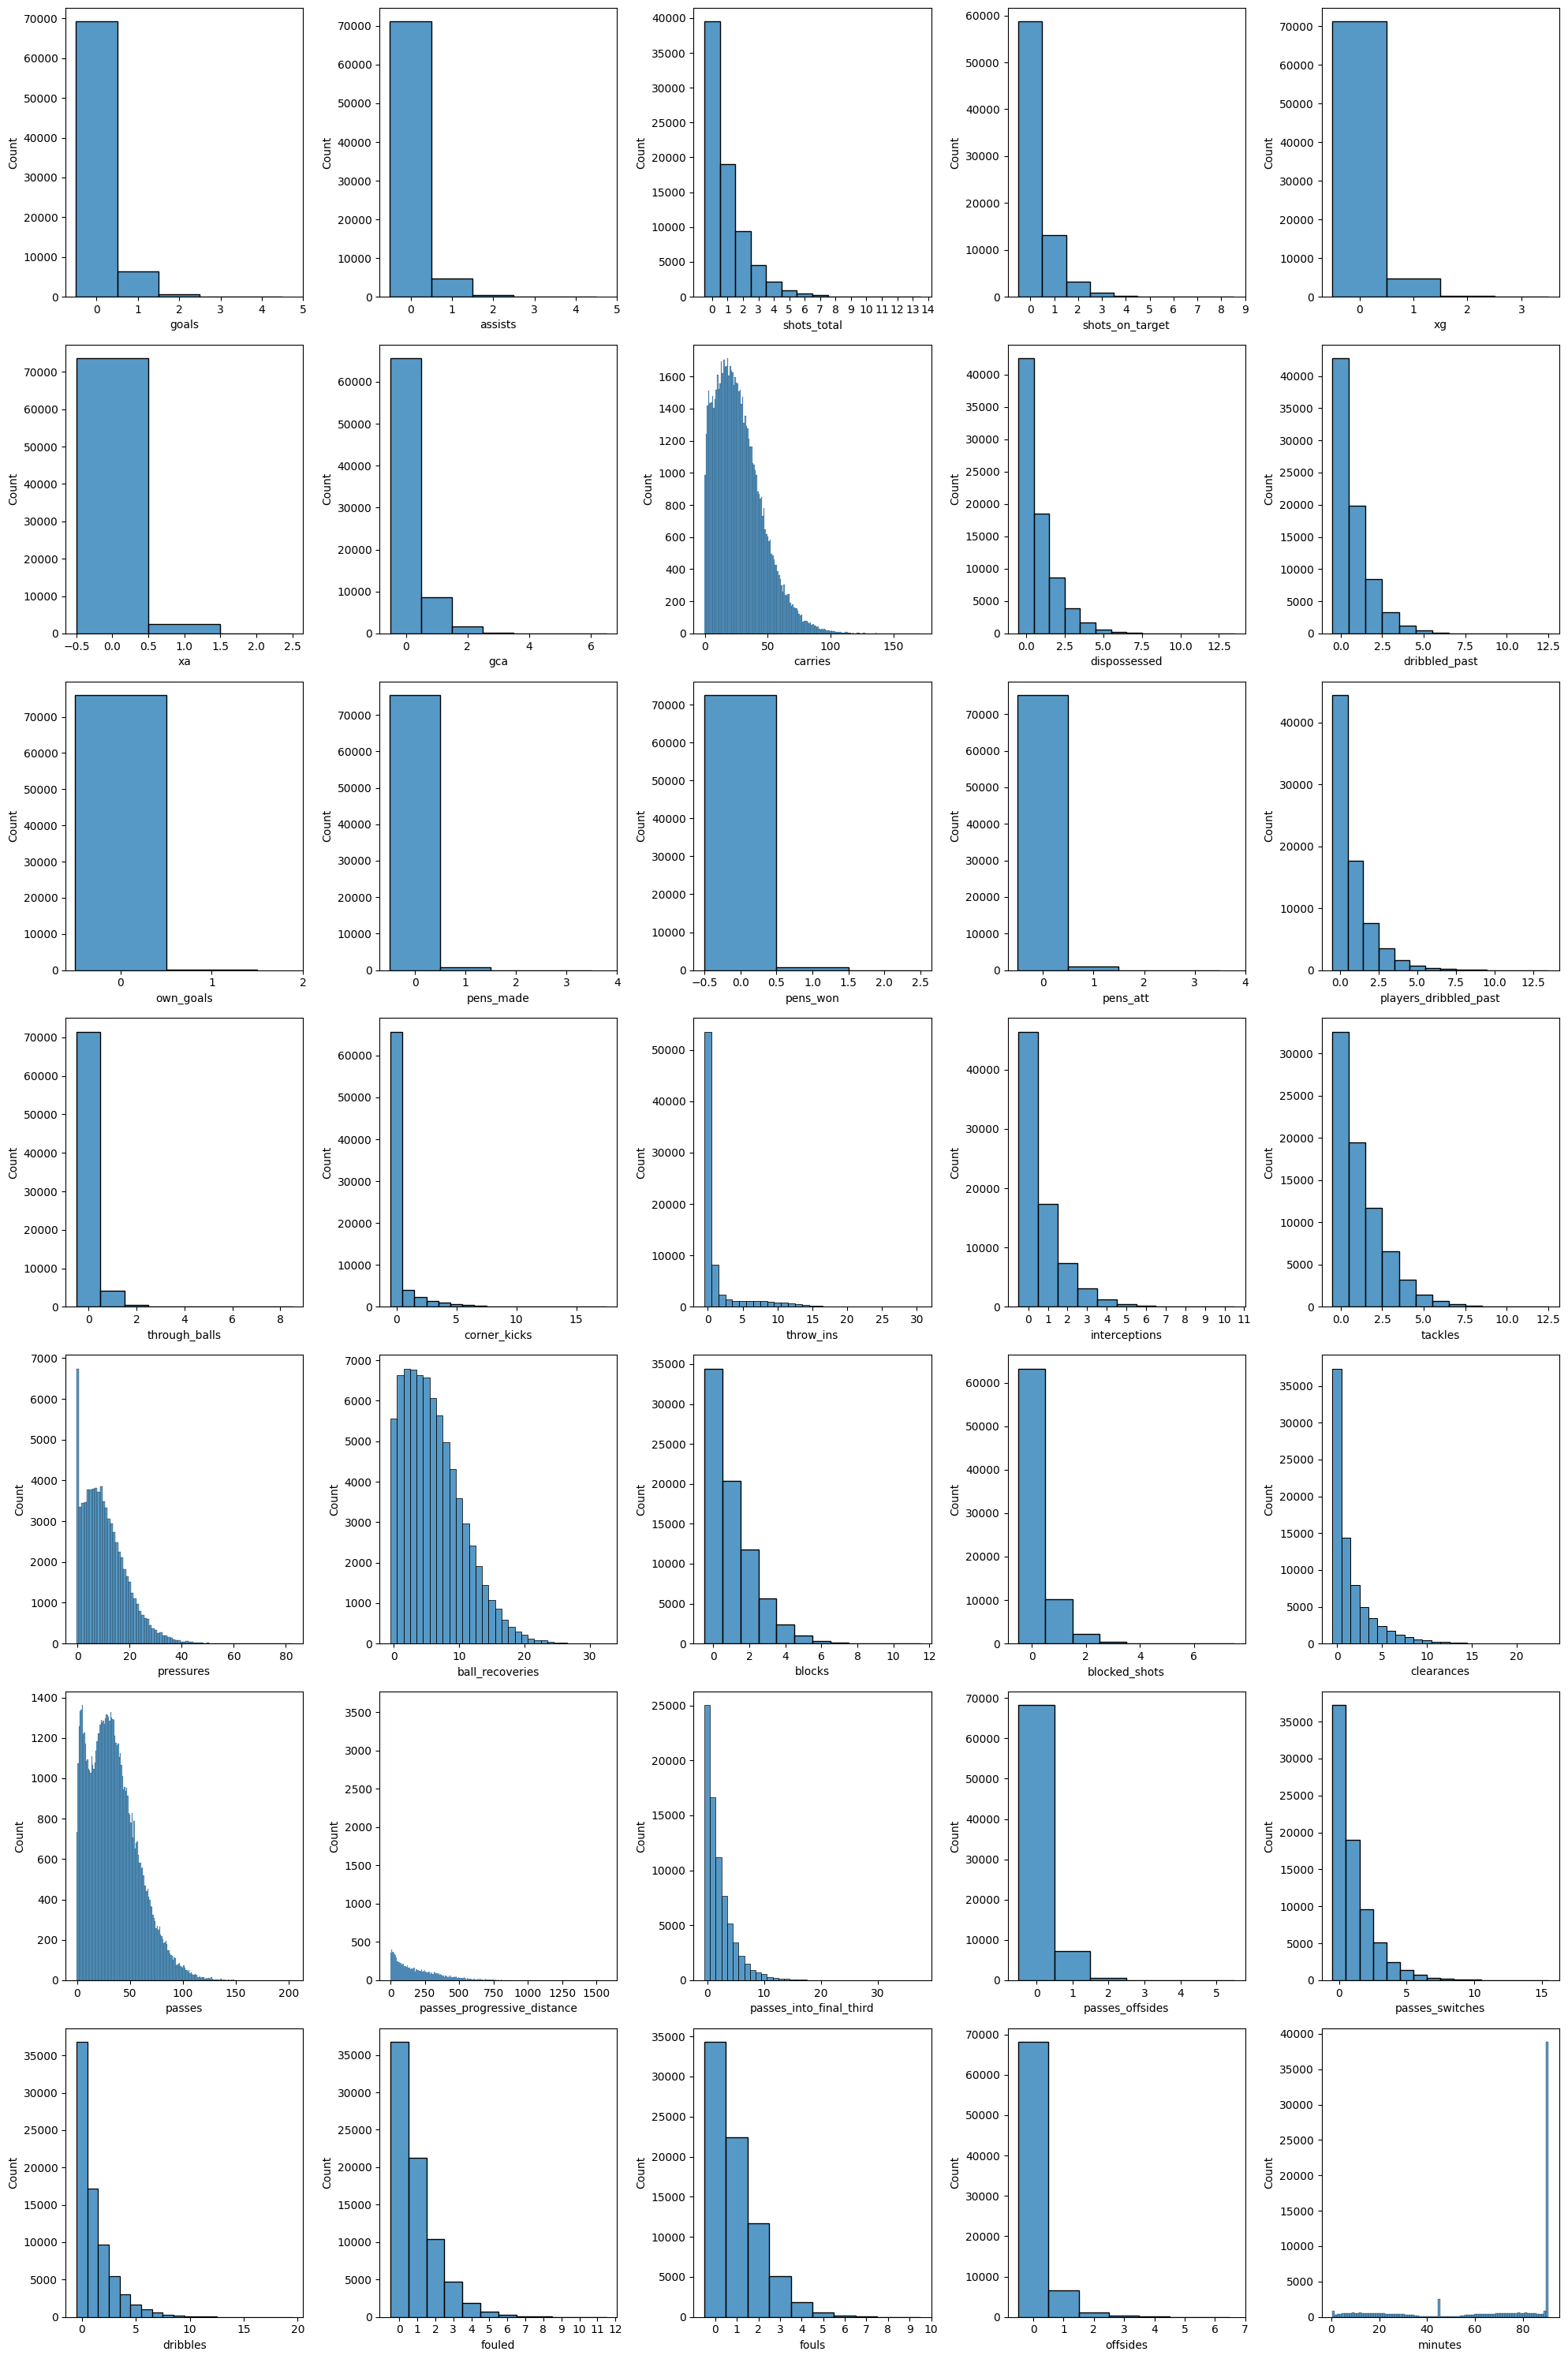

In [23]:
create_subplots(df, important_cols, 7, 5, figsize=(20, 30))

As we can see most of the columns have distribution which is similar to **exponential distribution** which is pretty understandable because for example most of the players in a certain match have 0 goals or assists